# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [28]:
# Reading NOAA data and putting it into a data frame
noaa = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#print(noaa)

noaa = noaa.sort(['ID', 'Date'], ascending = True)
print(noaa)

                 ID        Date Element  Data_Value
55067   USC00200032  2005-01-01    TMIN         -28
55102   USC00200032  2005-01-01    TMAX          67
112671  USC00200032  2005-01-02    TMAX         122
112708  USC00200032  2005-01-02    TMIN          -6
104159  USC00200032  2005-01-03    TMIN          11
104196  USC00200032  2005-01-03    TMAX          39
3408    USC00200032  2005-01-04    TMIN           6
3447    USC00200032  2005-01-04    TMAX          22
8161    USC00200032  2005-01-05    TMIN         -44
16564   USC00200032  2005-01-05    TMAX           6
107265  USC00200032  2005-01-06    TMIN         -56
107270  USC00200032  2005-01-06    TMAX         -17
81708   USC00200032  2005-01-07    TMAX         -22
81728   USC00200032  2005-01-07    TMIN         -72
116059  USC00200032  2005-01-08    TMAX           6
116063  USC00200032  2005-01-08    TMIN         -33
123466  USC00200032  2005-01-09    TMAX          17
123469  USC00200032  2005-01-09    TMIN         -22
28270   USC0

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [29]:
# Creates columns Year and Month using zip method
noaa['Year'], noaa['Month-Day'] = zip(*noaa['Date'].apply(lambda x: (x[:4], x[5:])))
#print(noaa)

#Excludes February 29th
noaa = noaa[noaa['Month-Day'] != '02-29']
print(noaa)

                 ID        Date Element  Data_Value  Year Month-Day
55067   USC00200032  2005-01-01    TMIN         -28  2005     01-01
55102   USC00200032  2005-01-01    TMAX          67  2005     01-01
112671  USC00200032  2005-01-02    TMAX         122  2005     01-02
112708  USC00200032  2005-01-02    TMIN          -6  2005     01-02
104159  USC00200032  2005-01-03    TMIN          11  2005     01-03
104196  USC00200032  2005-01-03    TMAX          39  2005     01-03
3408    USC00200032  2005-01-04    TMIN           6  2005     01-04
3447    USC00200032  2005-01-04    TMAX          22  2005     01-04
8161    USC00200032  2005-01-05    TMIN         -44  2005     01-05
16564   USC00200032  2005-01-05    TMAX           6  2005     01-05
107265  USC00200032  2005-01-06    TMIN         -56  2005     01-06
107270  USC00200032  2005-01-06    TMAX         -17  2005     01-06
81708   USC00200032  2005-01-07    TMAX         -22  2005     01-07
81728   USC00200032  2005-01-07    TMIN         

In [30]:
# Grabbing the minimum temp and maximum temp

temp_min = noaa[(noaa['Element'] == 'TMIN') & (noaa['Year'] != '2015')].groupby('Month-Day').aggregate({'Data_Value':np.min})
temp_max = noaa[(noaa['Element'] == 'TMAX') & (noaa['Year'] != '2015')].groupby('Month-Day').aggregate({'Data_Value':np.max})

#print(temp_min.head())
#print(temp_max.head())

           Data_Value
Month-Day            
01-01            -160
01-02            -267
01-03            -267
01-04            -261
01-05            -150
           Data_Value
Month-Day            
01-01             156
01-02             139
01-03             133
01-04             106
01-05             128


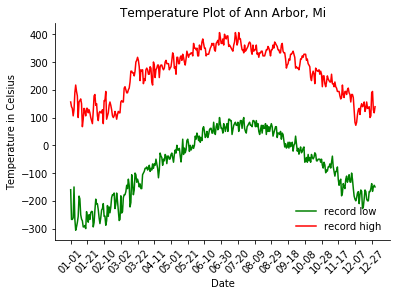

In [54]:
# Creates our plot figure with our min and max values plotted
plt.figure()
plt.plot(temp_min.values, 'g', label = 'record low')
plt.plot(temp_max.values, 'r', label = 'record high')

# Sets the ticks of our x axis
plt.xticks(range(0, len(temp_min), 20), temp_min.index[range(0, len(temp_min), 20)], rotation = '45')

# Labels our axes
plt.xlabel('Date')
plt.ylabel('Temperature in Celsius')
plt.title('Temperature Plot of Ann Arbor, Mi')

# Creates our legend
plt.legend(loc = 4, frameon = False)

# Gets rid of the top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()